# Generalized Linear Models

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

Across the module, we designate the vector $w = (w_1, ..., w_p)$ as `coef_` and $w_0$ as `intercept_`

To perform classification with generalized linear models, see **Logistic regression**.

-----

**Notes**
1. All the examples use the `sklearn` python library. 
2. If its possible we will try to replicate the examples using de `MLlib` package Spark 
3. See also [Linear Regression](https://dato.com/learn/userguide/supervised-learning/linear-regression.html) using the `GraphLab` library

-----

<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Regression</strong> Predicting a continuous-valued attribute associated with an object.
</div>

## 1 Ordinary Least Squares

[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the **residual sum of squares** between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form[*](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#p-norm):

$$\underset{w}{min\,} {|| X w - y||_2}^2$$
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_0011.png" width=400px/>

`LinearRegression` will take in its fit method arrays X, y and will store the coefficients $w$ of the linear model in its `coef_` member

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>LinearRegression</strong> (fit\_intercept=True, normalize=False, copy\_X=True, n\_jobs=1)
<br/>
Returns:
<ul>
<li>coef\_: estimated coefficients for the linear regression problem</li>
<li>intercept\_: independent term in the linear model</li>
</ul>
</div>

/Volumes/MacintoshDATA/softdevelopmentbcn/miniconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


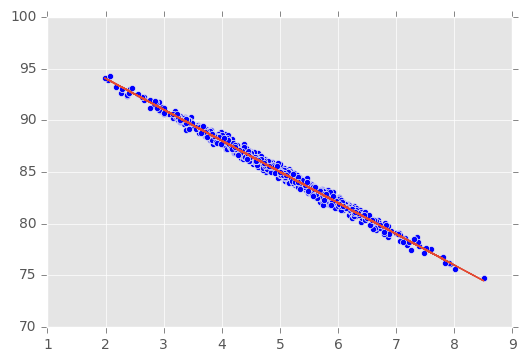

Slope:	[-3.00967998]
Intercept:	100.056446607
R^2 value:	0.990101515157


In [1]:
%matplotlib inline
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pageSpeeds = np.random.normal(5.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

regr = linear_model.LinearRegression()

# Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. 
# Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) 
# if it contains a single sample.

pageSpeeds2 = pageSpeeds.reshape(-1, 1)
regr.fit(pageSpeeds2, purchaseAmount)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, regr.predict(pageSpeeds2))
plt.show()

print 'Slope:\t{0}'.format(regr.coef_)
print 'Intercept:\t{0}'.format(regr.intercept_)
print 'R^2 value:\t{0}'.format(regr.score(pageSpeeds2, purchaseAmount))

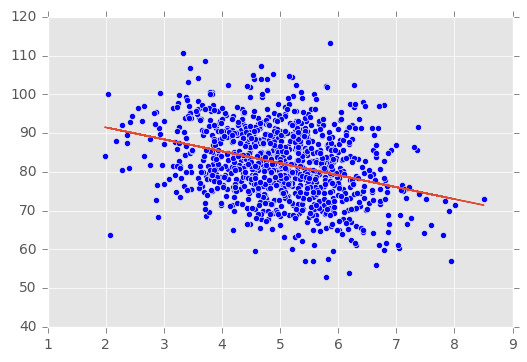

Slope:	[-3.00967998]
Intercept:	97.6565473486
R^2 value:	0.159918243629


In [2]:
purchaseAmount2 = 100 - (pageSpeeds + np.random.normal(1, 3, 1000)) * 3

regr2 = linear_model.LinearRegression()
regr2.fit(pageSpeeds2, purchaseAmount2)

plt.scatter(pageSpeeds, purchaseAmount2)
plt.plot(pageSpeeds, regr2.predict(pageSpeeds2))
plt.show()

print 'Slope:\t{0}'.format(regr.coef_)
print 'Intercept:\t{0}'.format(regr2.intercept_)
print 'R^2 value:\t{0}'.format(regr2.score(pageSpeeds2, purchaseAmount))

In [3]:
x = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]

clf = linear_model.LinearRegression()
clf.fit(x, y)
print 'Coefficients: {0}'.format(clf.coef_)
print 'Intercept: {0}'.format(clf.intercept_)

Coefficients: [ 0.5  0.5]
Intercept: 1.11022302463e-16


However, coefficient estimates for **Ordinary Least Squares** rely on the independence of the model terms. When terms are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

### EXAMPLE: Diabetes

[Diabetes Dataset brief description](http://scikit-learn.org/stable/datasets/#diabetes-dataset)

**Number of Instances**: 442  
**Number of Attributes**: First 10 columns are numeric predictive values  
**Target**:	Column 11 is a quantitative measure of disease progression one year after baseline  
**Attributes**:	Age | Sex | Body mass index | Average blood pressure | S1 | S2 | S3 | S4 | S5 | S6  

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)

In [3]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
type(diabetes)

sklearn.datasets.base.Bunch

In [6]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [11]:
diabetes.data.shape

(442, 10)

In [12]:
diabetes.target.shape

(442,)

In [26]:
# use only one feature: Body Mass Measure
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [27]:
diabetes_X[0:10]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215]])

In [28]:
type(diabetes_X)

numpy.ndarray

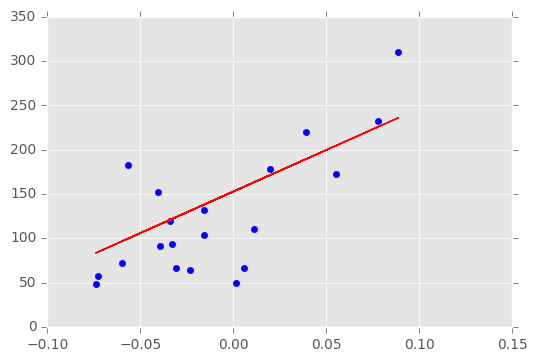

Coefficients: 
[ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


In [29]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='red',
         linewidth=1)

plt.show()

# The coefficients
print 'Coefficients: \n', regr.coef_
# The mean square error
print "Residual sum of squares: %.2f" % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print 'Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test)

### 1.1 Ordinary Least Squares Complexity

This method computes the least squares solution using a singular value decomposition of X. If X is a matrix of size (n, p) this method has a cost of $O(n p^2)$, assuming that $n \geq p$.

## 2 Ridge Regression / Regularization

[Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) regression addresses some of the problems of [Ordinary Least Squares](#1-Ordinary-Least-Squares) by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$ \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2} $$

Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
<img src="http://scikit-learn.org/stable/_images/plot_ridge_path_0011.png" width=500px/>

$\alpha$ is the **regularization parameter** 

As with other linear models, `Ridge` will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef\_ member

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>Ridge</strong>(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
</div>

In [8]:
x = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]
clf = linear_model.Ridge (alpha = .5)
clf.fit (x, y)
print 'Coefficients: {0}'.format(clf.coef_)
print 'Intercept: {0}'.format(clf.intercept_)
print 'Residual sum of squares: {0}'.format(np.mean((clf.predict(x) - y) ** 2))
print 'Alpha (regularization parameter): %.2f' % clf.alpha

Coefficients: [ 0.34545455  0.34545455]
Intercept: 0.136363636364
Residual sum of squares: 0.0165840220386
Alpha (regularization parameter): 0.50


In [9]:
x = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]
clf = linear_model.LinearRegression()
clf.fit(x, y)
print 'Coefficients: {0}'.format(clf.coef_)
print 'Intercept: {0}'.format(clf.intercept_)
print 'Residual sum of squares: {0}'.format(np.mean((clf.predict(x) - y) ** 2))

Coefficients: [ 0.475  0.475]
Intercept: 0.05
Residual sum of squares: 0.00166666666667


### 2.1 Ridge Complexity

This method has the same order of complexity than an [Ordinary Least Squares](#1.1-Ordinary-Least-Squares-Complexity)

### Example: Plot Ridge coefficients as a function of the regularization

Shows the effect of collinearity in the coefficients of an estimator. Each color represents a different feature of the coefficient vector and this is displayed as a function of the regularization parameter

[[ 1.          0.5         0.33333333  0.25        0.2         0.16666667
   0.14285714  0.125       0.11111111  0.1       ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667  0.14285714
   0.125       0.11111111  0.1         0.09090909]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714  0.125
   0.11111111  0.1         0.09090909  0.08333333]
 [ 0.25        0.2         0.16666667  0.14285714  0.125       0.11111111
   0.1         0.09090909  0.08333333  0.07692308]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111  0.1
   0.09090909  0.08333333  0.07692308  0.07142857]
 [ 0.16666667  0.14285714  0.125       0.11111111  0.1         0.09090909
   0.08333333  0.07692308  0.07142857  0.06666667]
 [ 0.14285714  0.125       0.11111111  0.1         0.09090909  0.08333333
   0.07692308  0.07142857  0.06666667  0.0625    ]
 [ 0.125       0.11111111  0.1         0.09090909  0.08333333  0.07692308
   0.07142857  0.06666667  0.0625      0.05882353]
 [ 0.1111111

/Volumes/MacintoshDATA/softdevelopmentbcn/miniconda2/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


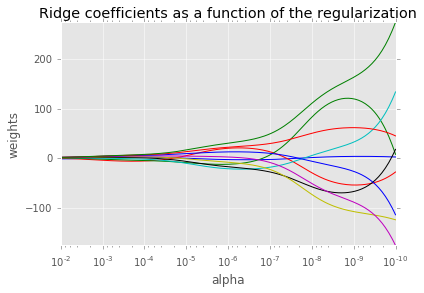

In [10]:
X = 1. / (np.arange(1, 11)+np.arange(0,10)[:, np.newaxis])
y = np.ones(10)
print X
print y

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
RSS = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    RSS.append(np.mean((clf.predict(X) - y) ** 2))

# Display results
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

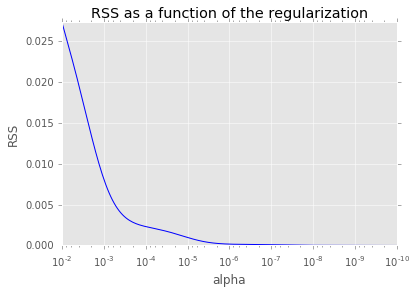

In [11]:
# Display errors
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, RSS)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('RSS')
plt.title('RSS as a function of the regularization')
plt.axis('tight')
plt.show()

In [12]:
clf = linear_model.RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0])
clf.fit(X, y)       
clf.alpha_ 

0.001

### 2.2 Setting the regularization parameter: generalized Cross-Validation

[RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV), an efficient form of leave-one-out cross-validation

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>RidgeCV</strong>(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
</div>

In [13]:
x = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit(x, y)       
clf.alpha_                                

0.10000000000000001

In [14]:
clf = linear_model.Ridge (alpha = 0.1)
clf.fit (x, y)
print 'Coefficients: {0}'.format(clf.coef_)
print 'Intercept: {0}'.format(clf.intercept_)
print 'Residual sum of squares: {0}'.format(np.mean((clf.predict(x) - y) ** 2))
print 'Alpha (regularization parameter): %.2f' % clf.alpha

Coefficients: [ 0.44186047  0.44186047]
Intercept: 0.0720930232558
Residual sum of squares: 0.00264287001983
Alpha (regularization parameter): 0.10


In [15]:
clf = linear_model.Ridge (alpha = 1)
clf.fit (x, y)
print 'Coefficients: {0}'.format(clf.coef_)
print 'Intercept: {0}'.format(clf.intercept_)
print 'Residual sum of squares: {0}'.format(np.mean((clf.predict(x) - y) ** 2))
print 'Alpha (regularization parameter): %.2f' % clf.alpha

Coefficients: [ 0.27142857  0.27142857]
Intercept: 0.185714285714
Residual sum of squares: 0.0385034013605
Alpha (regularization parameter): 1.00


In [16]:
clf = linear_model.Ridge (alpha = 10)
clf.fit (x, y)
print 'Coefficients: {0}'.format(clf.coef_)
print 'Intercept: {0}'.format(clf.intercept_)
print 'Residual sum of squares: {0}'.format(np.mean((clf.predict(x) - y) ** 2))
print 'Alpha (regularization parameter): %.2f' % clf.alpha

Coefficients: [ 0.05588235  0.05588235]
Intercept: 0.329411764706
Residual sum of squares: 0.157808535179
Alpha (regularization parameter): 10.00


### Example: Using a polynomial model to show Ridge Regression

Let's create a dataset based on a true sinusoidal relationship. Let's look at a synthetic dataset consisting of 30 points drawn from the sinusoid $y = \sin(4x)$:

In [17]:
import random
import pandas as pd

random.seed(98103)
n = 30
x = np.array([random.random() for i in range(n)])
x.sort()

In [18]:
x

array([ 0.03957894,  0.0415681 ,  0.07243195,  0.15028904,  0.16133414,
        0.19195631,  0.23283392,  0.25990098,  0.38014581,  0.43244472,
        0.47056698,  0.4714946 ,  0.4787064 ,  0.49053554,  0.54678006,
        0.56968036,  0.60793245,  0.62023754,  0.63009313,  0.64500967,
        0.6467576 ,  0.69908978,  0.79024505,  0.81038465,  0.82932089,
        0.85011156,  0.88636844,  0.89114108,  0.90438848,  0.92448587])

In [19]:
y = np.sin(4*x)

In [20]:
y

array([ 0.15765527,  0.16550732,  0.28569137,  0.56559633,  0.60146736,
        0.69457232,  0.80241773,  0.86220366,  0.99873959,  0.98738887,
        0.95188361,  0.95073995,  0.9414033 ,  0.92439655,  0.81600889,
        0.75971273,  0.65172975,  0.6136243 ,  0.58202776,  0.53250217,
        0.52657119,  0.33841644, -0.01938632, -0.09977964, -0.17478847,
       -0.25597249, -0.39299012, -0.41047204, -0.45819309, -0.52809088])

Add random Gaussian noise to y

In [21]:
random.seed(1)
e = np.array([random.gauss(0, 1.0/3.0) for i in range(n)])
y = y + e
y

array([ 0.58705019,  0.64865585,  0.30780331,  0.31074845,  0.23740963,
        0.70501716,  0.46171668,  0.38326051,  1.06517691,  1.03184707,
        1.13403971,  0.64608297,  0.94307173,  0.90281597,  0.31406589,
        0.93904512,  0.75863345,  1.40999498,  0.64968415,  0.48426807,
        0.93749025,  0.40468019,  0.28362402, -0.22162773, -0.10206453,
        0.08545707, -0.16090778, -0.36764796, -0.81896243, -0.37968362])

In [22]:
data = pd.DataFrame({'X1':x, 'Y':y})
data

,X1,Y
0,0.039579,0.587050
1,0.041568,0.648656
2,0.072432,0.307803
3,0.150289,0.310748
4,0.161334,0.237410
5,0.191956,0.705017
6,0.232834,0.461717
7,0.259901,0.383261
8,0.380146,1.065177
9,0.432445,1.031847


In [23]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')

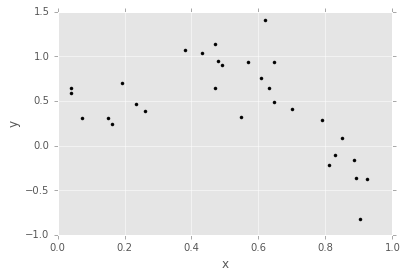

In [24]:
plot_data(data)

In [25]:
def polynomial_features(data, deg):
    data_copy = data.loc[:,['X1']]
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [26]:
def polynomial_regression(data, deg):
    model = linear_model.LinearRegression()
    model.fit(polynomial_features(data, deg), data['Y'])
    return model

In [27]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coef_)
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = pd.DataFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [28]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coef_)

    # Get learned parameters as a list
    w = [model.intercept_]
    coefs = list(model.coef_)
    for coef in coefs:
        w.append(coef)

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print np.poly1d(w)

def print_coefficients2(model):    
    # Get the degree of the polynomial
    deg = len(model.coef_)

    # Get learned parameters as a list
    w = [model.intercept_]
    coefs = list(model.coef_)
    for coef in coefs:
        w.append(coef)

    print w

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


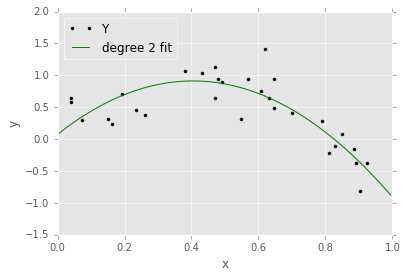

In [29]:
model = polynomial_regression(data, deg=2)
plot_poly_predictions(data, model)
print_coefficients(model)

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


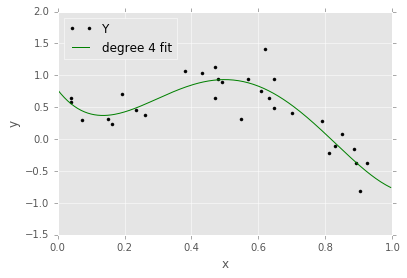

In [30]:
model = polynomial_regression(data, deg=4)
plot_poly_predictions(data, model)
print_coefficients(model)

Learned polynomial for degree 16:
           16             15            14             13
3.337e+08 x  - 2.226e+09 x  + 6.62e+09 x  - 1.156e+10 x 
              12         11             10             9             8
 + 1.309e+10 x  - 1e+10 x  + 5.141e+09 x  - 1.657e+09 x + 2.259e+08 x
              7             6             5             4             3
 + 6.689e+07 x - 4.733e+07 x + 1.393e+07 x - 2.547e+06 x + 3.018e+05 x
              2
 - 2.188e+04 x + 839.3 x - 12.01


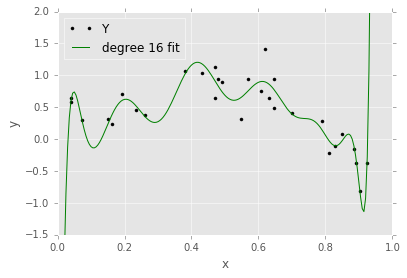

In [31]:
model = polynomial_regression(data, deg=16)
plot_poly_predictions(data, model)
print_coefficients(model)

Coefficients of the degree-16 polynomial regression model

In [32]:
print_coefficients2(model)

[-12.00714115890751, 839.31989686782981, -21875.571238845892, 301757.80000983021, -2547493.3180688065, 13931734.492593808, -47330260.243118294, 66889909.745730482, 225934342.88592398, -1657453169.7479823, 5140744618.7839966, -10002433058.005793, 13091704048.597811, -11558207065.640083, 6620394134.0417404, -2225629211.4507427, 333721454.22002959]


**Ridge Regression**
Perfoming a ridge fit of a degree-16 polynomial

In [33]:
def polynomial_ridge_regression(data, deg, l2_penalty=0):
    model = linear_model.Ridge()
    model.set_params(alpha=l2_penalty)
    model.fit(polynomial_features(data, deg), data['Y'])
    return model

Let's look at fits for a sequence of increasing $\alpha$ (l2_penalty) values

alpha = 1.00e-25
Learned polynomial for degree 16:
           16             15             14             13
3.214e+08 x  - 2.129e+09 x  + 6.275e+09 x  - 1.082e+10 x 
              12             11             10             9
 + 1.201e+10 x  - 8.891e+09 x  + 4.299e+09 x  - 1.183e+09 x
              8           7             6             5             4
 + 2.575e+07 x + 1.3e+08 x - 6.202e+07 x + 1.641e+07 x - 2.843e+06 x
              3             2
 + 3.255e+05 x - 2.308e+04 x + 873.5 x - 12.41


alpha = 1.00e-10
Learned polynomial for degree 16:
      16        15        14         13        12        11         10
7567 x  - 7803 x  - 6900 x  + 714.4 x  + 6541 x  + 5802 x  - 498.1 x 
         9        8        7        6        5         4         3
 - 6056 x - 4252 x + 3439 x + 4893 x - 4281 x + 769.9 x + 100.6 x
          2
 - 11.39 x - 4.716 x + 0.7859


alpha = 1.00e-06
Learned polynomial for degree 16:
        16         15         14         13         12         11
-11.68 

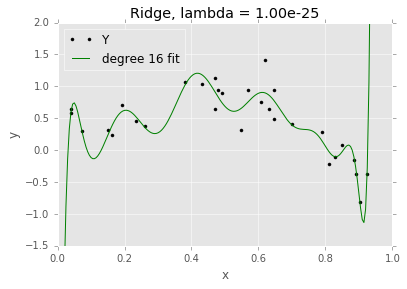

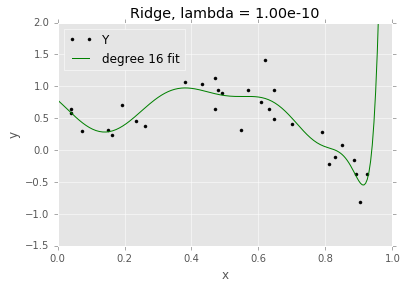

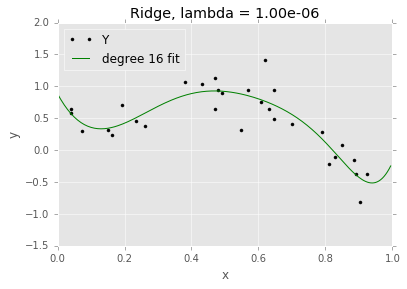

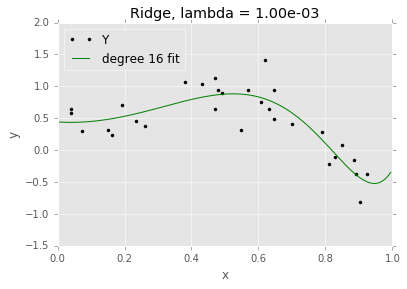

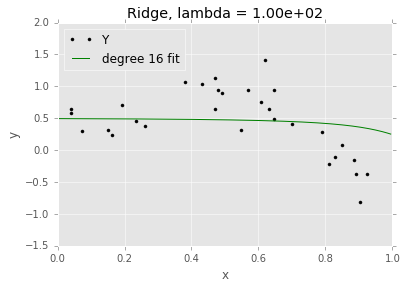

In [34]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    print 'alpha = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

**Ridge Regression Cross-Validation** [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) implements ridge regression with built-in cross-validation of the alpha parameter

`RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)`

By default, it performs Generalized Cross-Validation, which is a form of efficient [Leave-One-Out cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo).

Some useful parameters:

**cv** : int, cross-validation generator or an iterable, optional
Determines the cross-validation splitting strategy. Possible inputs for cv are:

- None, to use the efficient Leave-One-Out cross-validation
- integer, to specify the number of folds.
- An object to be used as a cross-validation generator.
- An iterable yielding train/test splits.

For integer/None inputs, if y is binary or multiclass, `StratifiedKFold` used, else, `KFold` is used.

In [35]:
deg = 16
l2_penalty_values = np.logspace(-4, 10, num=10)
modelRidgeCV = linear_model.RidgeCV(alphas=l2_penalty_values)
modelRidgeCV.fit(polynomial_features(data, deg), data['Y'])
modelRidgeCV.alpha_

0.0035938136638046258

Learned polynomial for degree 16:
        16          15          14          13          12          11
0.4539 x  + 0.4839 x  + 0.5053 x  + 0.5103 x  + 0.4885 x  + 0.4255 x 
           10           9          8          7         6        5
 + 0.3026 x  + 0.09718 x - 0.2146 x - 0.6473 x - 1.179 x - 1.68 x
          4         3         2
 - 1.782 x - 0.727 x + 1.932 x + 0.5584 x + 0.3803


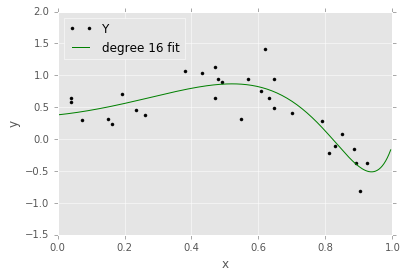

In [36]:
best_12_penalty = modelRidgeCV.alpha_
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_12_penalty)
plot_poly_predictions(data, model)
print_coefficients(model)

In [37]:
modelRidgeCV = linear_model.RidgeCV(alphas=l2_penalty_values, cv=n)
modelRidgeCV.fit(polynomial_features(data, deg), data['Y'])
modelRidgeCV.alpha_

0.0001

Learned polynomial for degree 16:
         16          15          14          13          12
-0.1114 x  - 0.6262 x  - 0.9154 x  - 0.9313 x  - 0.6341 x 
             11          10         9         8         7         6
 - 0.006429 x  + 0.9155 x  + 1.988 x + 2.872 x + 2.938 x + 1.264 x
         5         4         3         2
 - 2.89 x - 8.226 x - 7.236 x + 12.68 x - 2.791 x + 0.5925


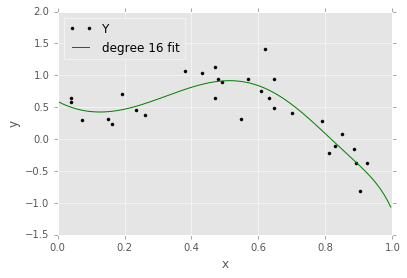

In [38]:
best_12_penalty = modelRidgeCV.alpha_
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_12_penalty)
plot_poly_predictions(data, model)
print_coefficients(model)